In [22]:
!pip install unidecode
!!pip install contractions
!pip install twython
!pip install vaderSentiment

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import contractions
import re
import unidecode
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt  
from textblob import TextBlob
from pandas.core.algorithms import diff
from pandas._libs.algos import diff_2d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
data = pd.read_csv('/content/combined_labelled_processed.csv', encoding="ISO-8859-1")

<ipython-input-23-2ad56e88d4ff>:1: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/combined_labelled_processed.csv', encoding="ISO-8859-1")


In [24]:
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,game,labels,processed
0,G_F758,FALSE,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0,"['hogwarts', 'legacy', 'flight', 'the', 'good'..."
1,DeVinSimmons,FALSE,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],HGL,0.0,"['oh', 'and', 'how', 'smooth', 'get', 'on', 'a..."
2,cozzboz,FALSE,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],HGL,0.0,"['play', 'endless', 'hours', 'of', 'get', 'me'..."
3,Fantastic_4ork,FALSE,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",HGL,0.0,"['hey', 'how', 'about', 'that', 'for', 'd', 'd..."
4,jordan_sebas2,FALSE,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0,"['hogwarts', 'legacy', 'flight', 'the', 'good'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",ELR,NaN,"['video', 'of', 'elder', 'ring', 'all', 'quest..."
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",ELR,NaN,"['red', 'wolf', 'of', 'dragon', 'rl1', 'not', ..."
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",ELR,NaN,"['apart', 'of', 'miruku', 'with', 'her', 'apos..."
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",ELR,NaN,"['this', 'comic', 'be', 'definitely', 'worth',..."


In [25]:
data.game.value_counts()

GOW          20623
HGL          17128
Cyberpunk    14595
ELR           9617
MHW           8957
Stardew       8630
Name: game, dtype: int64

In [26]:
# Replace 9.0 with 0.0 in "labels" column - accidentally added during labelling
data["labels"].replace(9.0, 0.0, inplace=True)

# Print updated value counts of labels
print(data["labels"].value_counts())

 0.0    4340
 1.0    1175
-1.0     578
Name: labels, dtype: int64


In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
def expand_contractions(text):
  return contractions.fix(text)

In [30]:
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
       
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" with removed accented characters.
        
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
        
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

In [31]:
def preprocess_tweets(tweet):
  text = tweet.lower()
  text = re.sub("\B\#[A-z0-9_]+\\b", "", text)
  text=re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)", "",text)
  # text=re.sub(r"\ [A-Za-z]*\.com", " ",text)
  text = re.sub("[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text) #corrected regex
  text = re.sub("\B\@[A-z0-9_]+\\b", "", text)
  text=accented_characters_removal(text)
  text=expand_contractions(text)
  return text

In [32]:
cleantext=[]
i=0
for item in data['rawContent']:
    if type(item)==float:
      item = str(item)
    words=preprocess_tweets(item)
    cleantext+=[words]
    i+=1
    if i%500==0:
      print(i)
data['vader_preprocessing_text'] = cleantext
data

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,game,labels,processed,vader_preprocessing_text
0,G_F758,FALSE,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0,"['hogwarts', 'legacy', 'flight', 'the', 'good'...",hogwarts legacy flight the good flight (silver...
1,DeVinSimmons,FALSE,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],HGL,0.0,"['oh', 'and', 'how', 'smooth', 'get', 'on', 'a...",oh and how smooth getting on and off the broom...
2,cozzboz,FALSE,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],HGL,0.0,"['play', 'endless', 'hours', 'of', 'get', 'me'...",playing endless hours of got me in the mood f...
3,Fantastic_4ork,FALSE,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",HGL,0.0,"['hey', 'how', 'about', 'that', 'for', 'd', 'd...",hey how about that for ? adegaa$?a*adegaaa ...
4,jordan_sebas2,FALSE,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0,"['hogwarts', 'legacy', 'flight', 'the', 'good'...",hogwarts legacy flight the good flight (silver...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",ELR,NaN,"['video', 'of', 'elder', 'ring', 'all', 'quest...",video of elden ring: all quests in order + mis...
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",ELR,NaN,"['red', 'wolf', 'of', 'dragon', 'rl1', 'not', ...",red wolf of radagon rl1 nohit
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",ELR,NaN,"['apart', 'of', 'miruku', 'with', 'her', 'apos...",fanart of miruku with her apostle (slim) and m...
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",ELR,NaN,"['this', 'comic', 'be', 'definitely', 'worth',...",this comic is definitely worth reading! come c...


In [33]:
def compute_vader_scores_v2(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])    
    return df

In [34]:
df3 = compute_vader_scores_v2(data,'vader_preprocessing_text')

In [35]:
df3.reset_index(drop = True,inplace = True)

In [36]:
class0=[]
for i in range(len(df3)):
    if df3.loc[i,'vader_neg']>0:
        class0+=[-1]
    elif df3.loc[i,'vader_pos']>0:
        class0+=[1]        
    else:
        class0+=[0]   

In [37]:
df3['class']=class0
df3['class'].value_counts()

 1    28597
 0    27696
-1    23257
Name: class, dtype: int64

In [38]:
test = df3[df3.labels.notnull()]

In [39]:
predicted= test['class']
accuracy_score=metrics.accuracy_score(predicted,test['labels'].astype('int'))

In [40]:
precision = round(metrics.precision_score(test['labels'].astype('int'),predicted, average="weighted"), 3)
recall = round(metrics.recall_score(test['labels'].astype('int'),predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(test['labels'].astype('int'), predicted, average="weighted"), 3)

In [41]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.4196619071065157
Precision:  0.639
Recall:  0.42
F1_score:  0.466


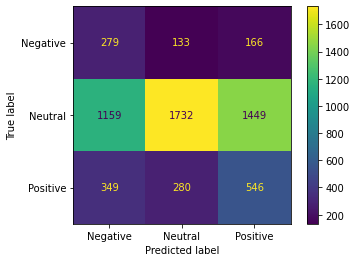

In [42]:
cm = confusion_matrix(test['labels'].astype('int'), predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot()

# Save the plot
plt.savefig('confusion_matrix_vader.png')

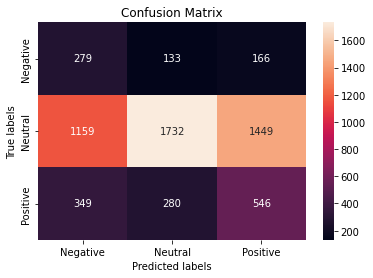

In [43]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral','Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral','Positive']);

In [44]:
def sentiment_analysis(df):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df["TextBlob_Subjectivity"] =   df["vader_preprocessing_text"].apply(getSubjectivity)
 df["TextBlob_Polarity"] = df["vader_preprocessing_text"].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 df["TextBlob_Analysis"] = df["TextBlob_Polarity"].apply(getAnalysis )
 return df

In [45]:
newdf = sentiment_analysis(df3)

In [46]:
final_class=[]
for ind,i in newdf.iterrows():
  if not(pd.isnull(i['labels'])):
    final_class.append(i['labels'])
  else:
    final_class.append(i['class'])

newdf['final_class']=final_class

In [47]:
testdf = newdf[newdf['labels'].notnull()]

In [48]:
predicted= testdf['TextBlob_Analysis']
accuracy_score=metrics.accuracy_score(predicted,testdf['labels'].astype('int'))

In [49]:
precision = round(metrics.precision_score(testdf['labels'].astype('int'),predicted, average="weighted"), 3)
recall = round(metrics.recall_score(testdf['labels'].astype('int'),predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(testdf['labels'].astype('int'), predicted, average="weighted"), 3)

In [50]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.45757426555063185
Precision:  0.631
Recall:  0.458
F1_score:  0.496


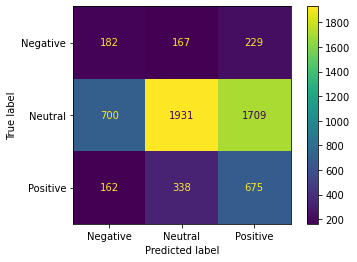

In [51]:
cm = confusion_matrix(testdf['labels'].astype('int'), predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot()

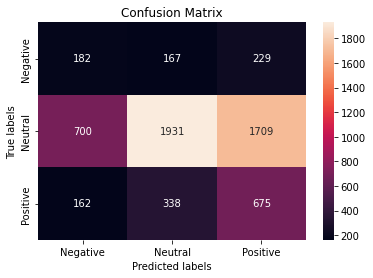

In [52]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral','Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral','Positive']);

In [53]:
newdf.to_csv('combined_vader_textblob_classified_data.csv',index = False)